
# Site Under Construction. Hard Hats Required.





In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# # for convergence
# if np.allclose(grad, np.zeros(len(grad))):
#     print("converged")

# # or

# if f(w_new) - f(w_prev) < 1e-6:
#     print("converged")

We start by importing the relavant libraries and creating some data points.

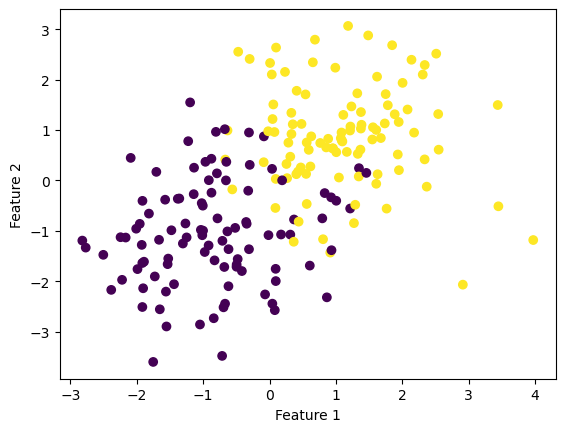

In [3]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [4]:
# fit the model
from solutions_logistic import LogisticRegression # your source code
import solutions_logistic as logis
LR = LogisticRegression()
X_ = LR.pad(X)


In [31]:
# inspect the fitted value of w

LR.fit(X, y, alpha = 0.01, max_epochs = 2000)

print(LR.w_)

[ 1.8122465   1.44176539 -0.3591226 ]


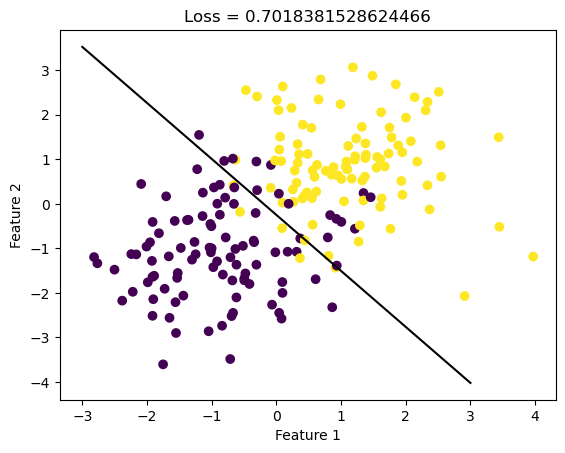

In [32]:
np.random.seed(123)

# pick a random weight vector and calculate the loss
w = .5 - np.random.rand(p_features)


loss = logis.empirical_risk(X_, y, logis.logistic_loss, w)

fig = plt.scatter(X_[:,0], X_[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

p = plt.plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")
title = plt.gca().set_title(f"Loss = {loss}")

# do the gradient descent

0.2115249411159688


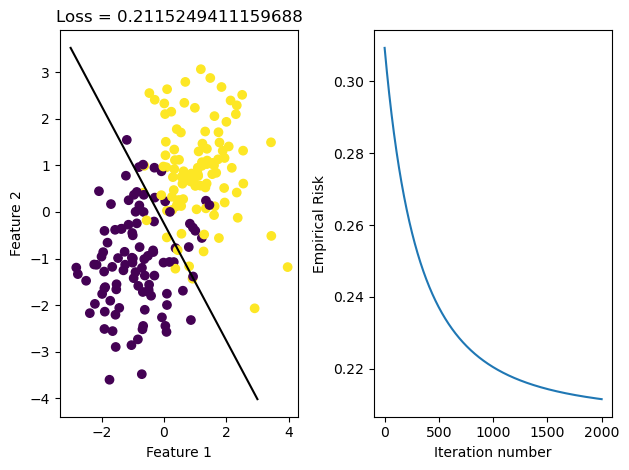

In [33]:
loss = logis.empirical_risk(X_, y, logis.logistic_loss, LR.w_)
print(loss)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

0.7155753577900521


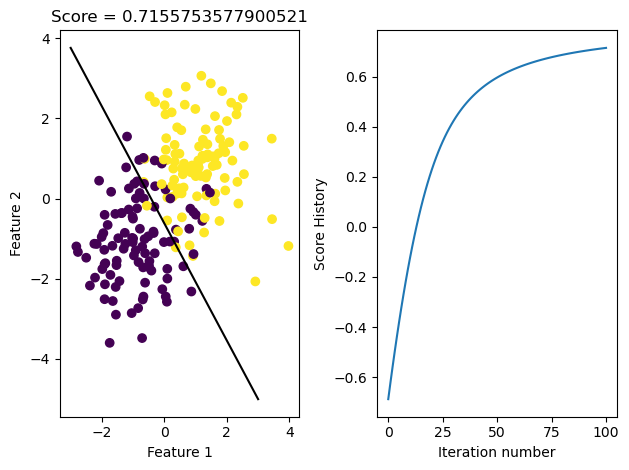

In [41]:
myScore = LR.score(X_,y)
print(myScore)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Score = {myScore}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")

axarr[1].plot(LR.score_history)

axarr[1].set(xlabel = "Iteration number", ylabel = "Score History")
plt.tight_layout()

In [10]:
print(y)
print(LR.predict(X_))

[0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0
 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1]
[0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1
 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1
 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1]


In [35]:
# print((1>0)*1)

In [36]:
# print((1<0)*1)

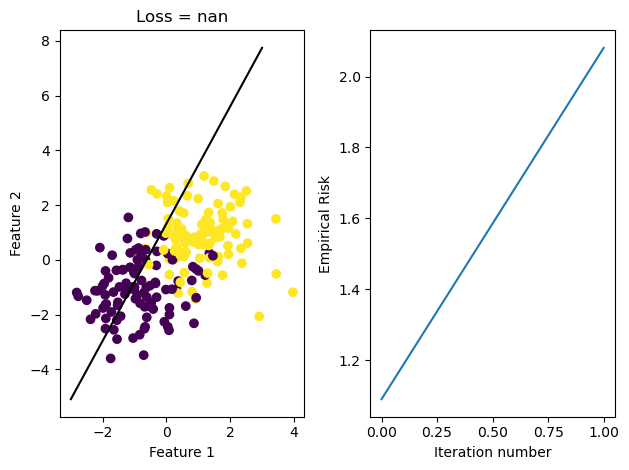

In [52]:

LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .05) 

loss = LR.stochastic_loss_history[-1]

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.omega_[2] - f1*LR.omega_[0])/LR.omega_[1], color = "black")

axarr[1].plot(LR.stochastic_loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

# Illustration

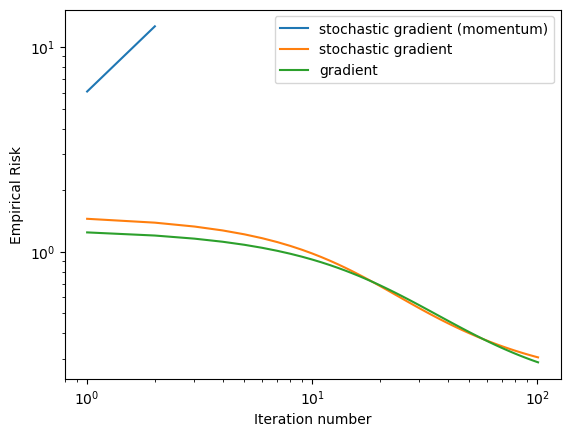

In [46]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = 0.05) 

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = 0.05)

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

xlab = plt.xlabel("Iteration number")
ylab = plt.ylabel("Empirical Risk")
plt.loglog()

legend = plt.legend() 